# Non Linear Relationship

In [0]:
import pandas as pd
import numpy as np

import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

%matplotlib inline

In [0]:
loan_df = pd.read_csv("https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/loan_analysis_summary.csv")

In [30]:
loan_df.head()

,fico_score,loan_total,default_total,dti,avg_loan_amnt,median_annual_inc,avg_annual_inc,int_rate,default_rate,actual_default_rate
0,500,3585,3183,19.737013,13660.71827,55000,63396.10292,15.352285,2.463470,0.520266
1,510,8223,7191,19.747810,13889.67226,56000,65446.52263,15.440212,5.565445,1.175378
2,520,9792,8370,20.085761,14186.13920,58728,68261.38708,15.312451,6.477927,1.368087
3,530,10984,9254,20.253199,14487.00838,60000,69041.52340,15.449011,7.162095,1.512578
4,540,12333,10127,20.770446,14756.36706,60000,69948.95243,15.271022,7.837750,1.655271


In [31]:
# Spearman is better when data is ordinal or has got monotonic relationship
loan_df[["fico_score", "loan_total"]].corr("spearman")

,fico_score,loan_total
fico_score,1.000000,0.043243
loan_total,0.043243,1.000000


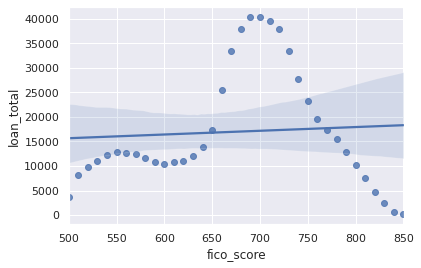

In [32]:
# Not a linear relationship.
sns.regplot(x="fico_score", y="loan_total", data=loan_df)

In [0]:
# Determine the degree of polynomial function usually by calculating number of bends + 1
# There are 4 bends
# So let us put the degree of polynomail as 5

In [0]:
coeff = np.poly1d(np.polyfit(loan_df["fico_score"], loan_df["loan_total"], 5))

In [0]:
t = loan_df["fico_score"]

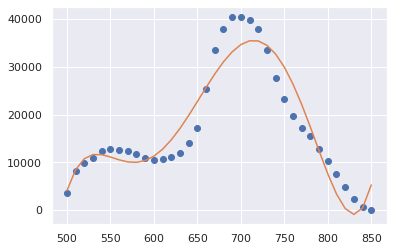

In [39]:
plt.plot(loan_df["fico_score"], loan_df["loan_total"], 'o', t, coeff(t), '-')
plt.show()

In [40]:
print(coeff)  # Powers of X used here

       5            4        3        2
6e-07 x - 0.001993 x + 2.62 x - 1704 x + 5.492e+05 x - 7.012e+07


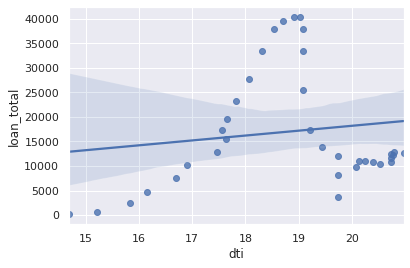

In [42]:
sns.regplot(x="dti", y="loan_total", data=loan_df)

In [0]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [0]:
polynomial_features = PolynomialFeatures(degree=5)

In [0]:
x_poly = polynomial_features.fit_transform(loan_df[["dti"]])

In [0]:
model = LinearRegression()

In [56]:
model.fit(x_poly, loan_df["loan_total"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
y_pred = model.predict(x_poly)

In [58]:
model.coef_

array([ 0.00000000e+00,  1.64176666e+08, -1.89566521e+07,  1.08943577e+06,
       -3.11593251e+04,  3.54805999e+02])

In [59]:
model.intercept_

-566235069.8431246

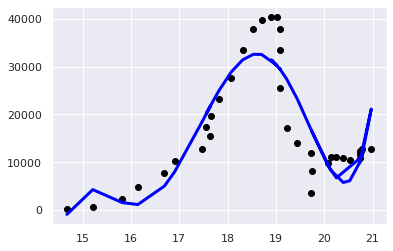

In [60]:
plt.scatter(loan_df["dti"], loan_df["loan_total"], color="black")
plt.plot(loan_df["dti"], y_pred, color="blue", linewidth=3)

In [0]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline

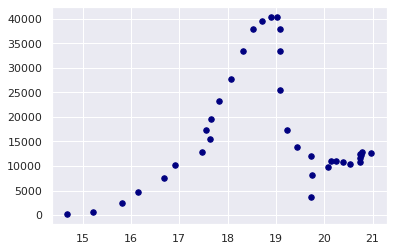

In [64]:
plt.scatter(loan_df["dti"], loan_df["loan_total"], color="navy", s=30, marker="o", label="training points")

In [0]:
colors = ["teal", "yellowgreen", "gold"]

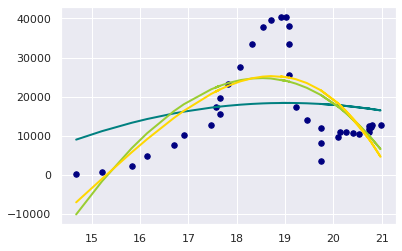

In [69]:
lw = 2
plt.scatter(loan_df["dti"], loan_df["loan_total"], color="navy", s=30, marker="o", label="training points")
for count, degree in enumerate([2, 3, 4]):
    model = make_pipeline(PolynomialFeatures(degree), Ridge())
    model.fit(loan_df[["dti"]], loan_df["loan_total"])
    y_plot = model.predict(loan_df[["dti"]])
    plt.plot(loan_df["dti"], y_plot, color = colors[count], linewidth=lw, label="degree %d" %(degree))